# DA Final project

## Grop Z

## Fortune_1000 - Data analysis & visualisation

<div style="direction:rtl"> בעבודתנו בחרנו לנתח את הדאטה סט 1000Fortune מאתר Kuggle. <br>
Fortune הינו מגזין עסקים אמריקאי המפרסם מידיי שנה את דירוג ה – Fortune 500, אשר מדרג את 500 התאגידים המובילים ביותר בעולם לפי הכנסות. <br>
מערך הנתונים איתו אנו מתעסקות כולל את ה1000 Fortune. <br>
מערך הנתונים שלנו כולל את הפיצ'רים הבאים: <br>
שם החברה, דירוג החברה, שינוי הדירוג מאשתקד, הכנסות, רווחים, מספר העובדים, סקטור (תחום עיסוק החברה), עיר מטה החברה, מדינת מטה החברה, האם החברה חדשה בדירוג,<br> 
האם המייסד הינו מנכ"ל החברה, האם מנכ"ל החברה הינה אישה, האם החברה רווחית, דירוג החברה אשתקד, <br> 
שם המנכ"ל, אתר החברה, סמל החברה (מתייחס לחברות ציבוריות), שווי שוק החברה.  <br>
<br>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [2]:
import warnings

import pandas as pd
from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)


In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/liorassayag/DB_pr/main/Fortune_1000.csv')
df.head()
#Fortune_1000.csv

,company,rank,rank_change,revenue,profit,num. of employees,sector,city,state,newcomer,ceo_founder,ceo_woman,profitable,prev_rank,CEO,Website,Ticker,Market Cap
0,Walmart,1,0.0,523964.0,14881.0,2200000,Retailing,Bentonville,AR,no,no,no,yes,1.0,C. Douglas McMillon,https://www.stock.walmart.com,WMT,411690
1,Amazon,2,3.0,280522.0,11588.0,798000,Retailing,Seattle,WA,no,yes,no,yes,5.0,Jeffrey P. Bezos,https://www.amazon.com,AMZN,1637405
2,Exxon Mobil,3,-1.0,264938.0,14340.0,74900,Energy,Irving,TX,no,no,no,yes,2.0,Darren W. Woods,https://www.exxonmobil.com,XOM,177923
3,Apple,4,-1.0,260174.0,55256.0,137000,Technology,Cupertino,CA,no,no,no,yes,3.0,Timothy D. Cook,https://www.apple.com,AAPL,2221176
4,CVS Health,5,3.0,256776.0,6634.0,290000,Health Care,Woonsocket,RI,no,no,yes,yes,8.0,Karen S. Lynch,https://www.cvshealth.com,CVS,98496


<div style="direction:rtl">בחינת טיפוסי הנתונים המופיעים בדאטה סט:  <br>
אפשר לראות שערכים שציפינו שיהיו בוליאניים, (למשל ceo_fouder, ceo_women) הינם מסוג object.  <br>
בנוסף ניתן לראות שטיפוס הנתונים של "שווי שוק החברה" הינו מסוג object. <br>
הערה - Market Cap(שווי שוק), חברות ציבוריות נסחרות לפי ערך המניות שלהן ושווי שוק זה מספר.  <br>
</div>


In [4]:
df.dtypes

company               object
rank                   int64
rank_change          float64
revenue              float64
profit               float64
num. of employees      int64
sector                object
city                  object
state                 object
newcomer              object
ceo_founder           object
ceo_woman             object
profitable            object
prev_rank             object
CEO                   object
Website               object
Ticker                object
Market Cap            object
dtype: object

<div style="direction:rtl">  בחינת הערכים החסרים. <br>
 <br>

</div>

In [5]:
df.isnull().sum().sort_values(ascending=False)

newcomer             500
Ticker                62
Market Cap            40
CEO                    8
profit                 2
revenue                0
num. of employees      0
sector                 0
city                   0
state                  0
rank                   0
ceo_founder            0
ceo_woman              0
profitable             0
prev_rank              0
Website                0
rank_change            0
company                0
dtype: int64

# Basic Visualizations

<div style="direction:rtl"> נרצה לבחון באופן ויזואלי את הערכים  הכמותיים שיש לנו בדאטה. <br>
השתמשנו בפונקציה - ()describe, שמראה מדדים סטטיסטיים על העמודות שבחרנו. <br>

</div>

In [6]:
df[['revenue', 'profit','num. of employees']].describe().round(0)

,revenue,profit,num. of employees
count,1000.0,998.0,1000.0
mean,15902.0,1345.0,34616.0
std,34763.0,4516.0,92024.0
min,1990.0,-8506.0,51.0
25%,3164.0,111.0,6400.0
50%,5647.0,381.0,13000.0
75%,12820.0,1061.0,29192.0
max,523964.0,81417.0,2200000.0


<div style="direction:rtl"> הצגת ויזואליזציות שונות על הנתונים: <br>
יצרנו BOXPLOT והיסטוגרמות לבחינת הנתונים הכמותיים – הכנסה, רווח ומספר העובדים.<br>
</div>

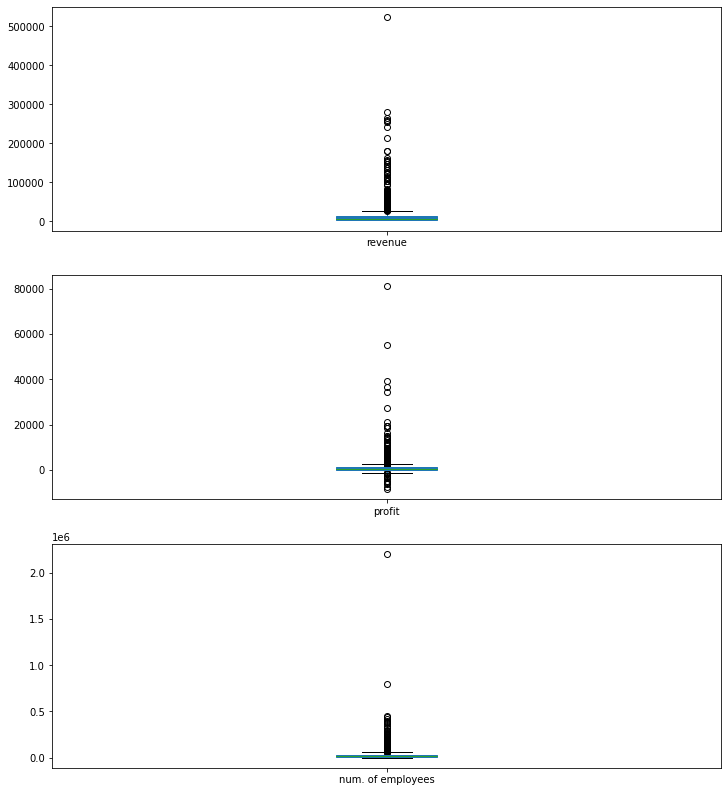

In [7]:
df[['revenue', 'profit','num. of employees']].plot(subplots=True, layout=(3,1), kind='box', figsize=(12,14), patch_artist=True)
plt.subplots_adjust(wspace=0.5);

<div style="direction:rtl"> ניתן לראות בשלושת ה"פלוטים",שיש התקבצות מאסיבית יחסית של הנתונים בערכים התחתונים ויש פיזור מאוד גדול של החריגים. <br>

</div>

array([[<AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>]], dtype=object)

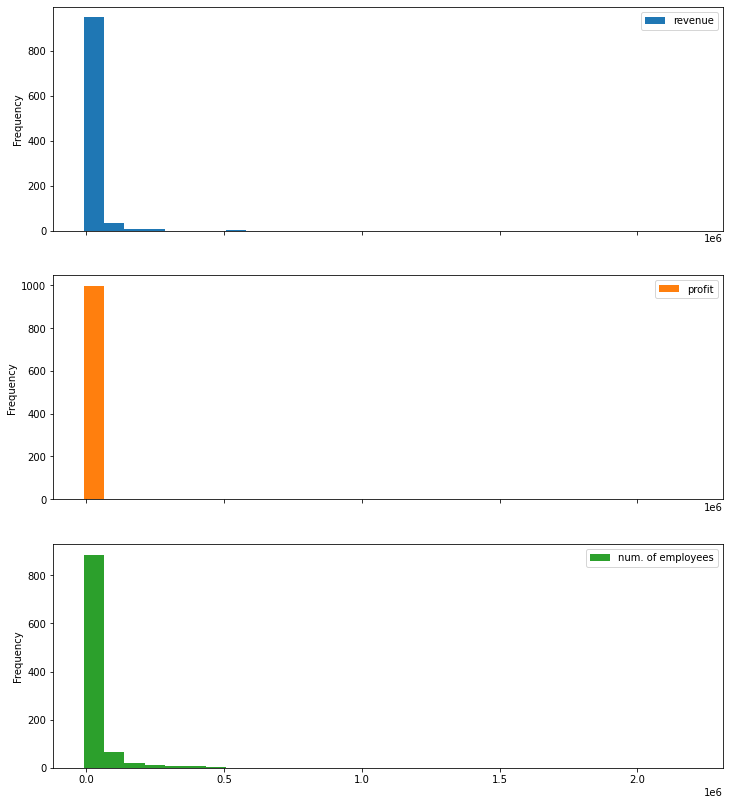

In [8]:
df[['revenue', 'profit','num. of employees']].plot(subplots=True, layout=(3,1), kind='hist', figsize=(12,14), bins=30)

<div style="direction:rtl">ניתן להבחין שאין התפלגות ברורה על הנתונים הכמותיים וכן הרוב המוחלט של החברות נמצא בהכנסות/רווחים/מספר עובדים קטן יחסית, ושהחריגים רחוקים מאוד מהמרכז וכן שיש כמות חריגים גדולה. <br>
כדי לראות טוב יותר את ההתפלגות נבחן את ההיסטוגרמה כאשר ציר הY הינו בגדילה מעריכית (לוגריתמי) <br>

</div>

array([[<AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>]], dtype=object)

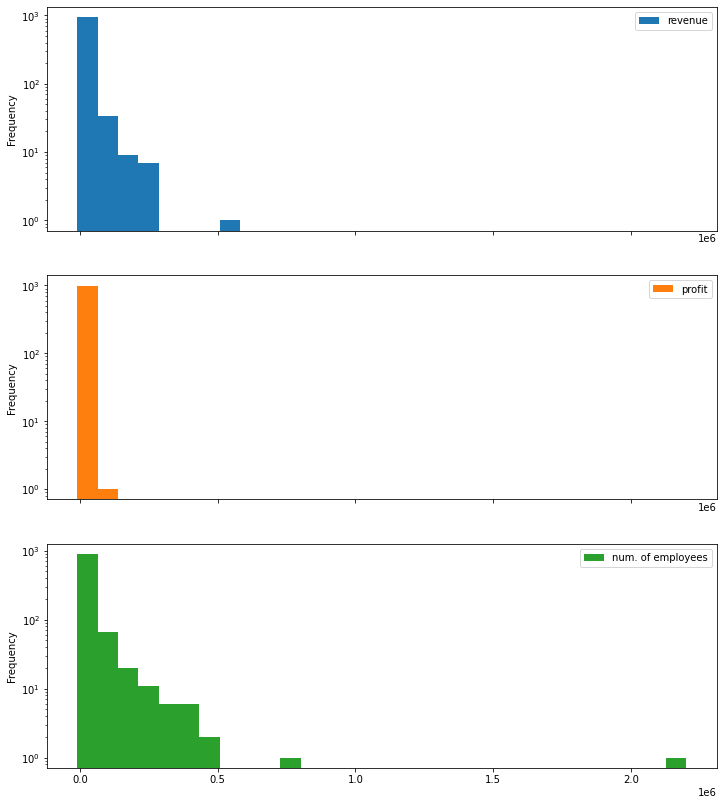

In [9]:
df[['revenue', 'profit','num. of employees']].plot(subplots=True, layout=(3,1), kind='hist', figsize=(12,14), bins=30,logy=True)


<div style="direction:rtl"> מהיסטוגרמה זו ניתן להבין יותר את התפלגות הערכים בצורה יותר מדוייקת. <br>
<br>
<br>
<br>
</div>



<div style="direction:rtl">המשך ויזואליזציות נוספות : משתנים קטגוריאליים: <br>
עד כה בדקנו ערכים כמותיים, כעת נרצה לבדוק ולעבוד עם ערכים קטגוריילים. <br>

</div>

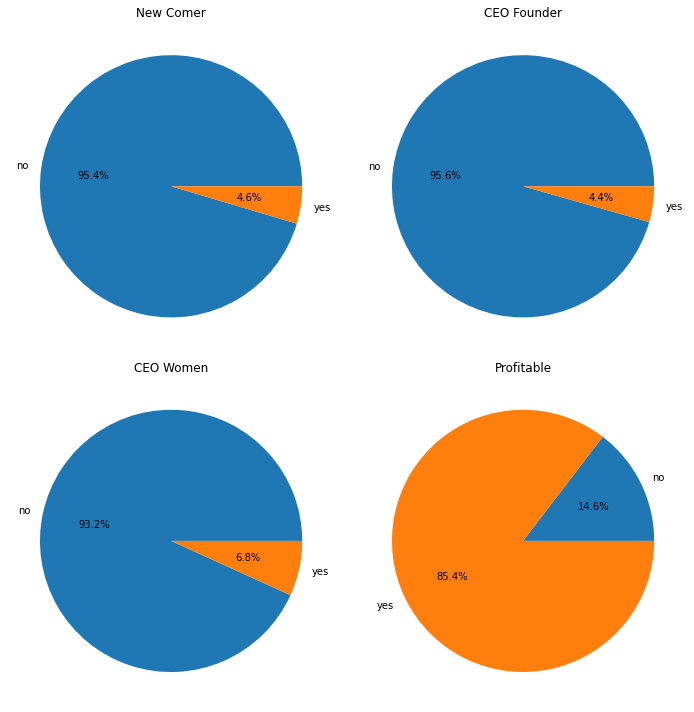

In [10]:
fig = plt.figure(figsize=(10,10))
label1=['no','yes']
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)
ax1.pie(df.groupby('newcomer')['newcomer'].count(),autopct="%1.1f%%",labels=label1)
ax1.set_title('New Comer')
ax2.pie(df.groupby('ceo_founder')['ceo_founder'].count(),autopct="%1.1f%%",labels=label1)
ax2.set_title('CEO Founder')
ax3.pie(df.groupby('ceo_woman')['ceo_woman'].count(),autopct="%1.1f%%",labels=label1)
ax3.set_title('CEO Women')
ax4.pie(df.groupby('profitable')['profitable'].count(),autopct="%1.1f%%",labels=label1)
ax4.set_title('Profitable')
plt.tight_layout()
plt.show()

<div style="direction:rtl">ניקוי הדאטה : <br>
יצרנו לולאת פור שמטרתה להפוך את הערכים של העמודות שאיתן בחרנו לעבוד - לערכים בינאריים <br>

</div> 

In [11]:
# df['ceo_founder'] = np.where(df['ceo_founder']=='yes',1,0)
# df['ceo_woman'] = np.where(df['ceo_woman']=='yes',1,0)
# df['profitable'] = np.where(df['profitable']=='yes',1,0)

for column in ['ceo_founder', 'ceo_woman', 'profitable']:
    df[column] = df[column].replace({'no': 0, 'yes': 1})

# Women In Fortune 500

<div style="direction:rtl"> יצרנו עמודה חדשה ובה חילקנו את הדאטה לקבוצות לפי רווחיות. <br>
בחרנו לעשות זאת משום שאנחנו רוצות להתייחס לקבוצות דירוג מתוך הנחה שהקבוצות יותר יציבות<br>

</div>

In [12]:
df['DecileRank']=pd.qcut(df['revenue'], 
                           q = 50, labels = False)

<div style="direction:rtl"> ראינו שחלק מהנשים שמשמשות בתפקיד מנכ"ל מהווה כ 6.8% מכלל הנתונים. <br>
נרצה לבחון האם אחוז זה נמצא במקטע מסויים או שמא הוא מתפלג באופן אחיד על פני כל המקטעים. <br>
לשם כך נשתמש בחלוקת הדירוג שעשינו<br>
</div> 

<AxesSubplot:xlabel='DecileRank'>

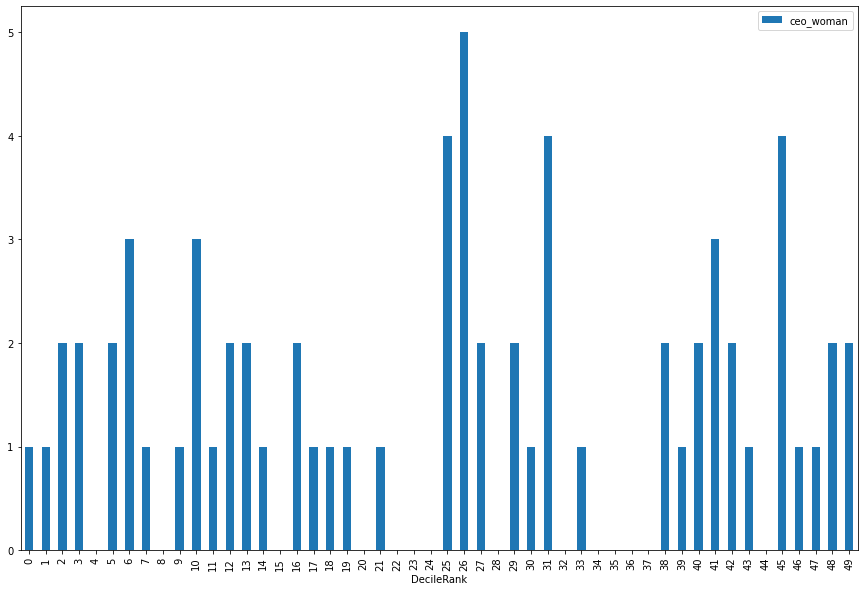

In [13]:
df.groupby('DecileRank')['ceo_woman'].sum().reset_index().sort_values(by =['DecileRank']).set_index('DecileRank').plot(kind='bar',figsize=(15,10))




### <div style="direction:rtl"> :מסקנה(1)<br>
יש ריכוז יחסית גבוה בעשירונים העליונים, אין ריכוז מיוחד בעשירונים נמוכים <br>

</div>

# Revenues & Profitable

<div style="direction:rtl">נבחן את הקשר בין הכנסות לגורמים משתנים אחרים. <br>
הדירוג מדרג את החברות לפי ההכנסות, אולם מעניין לראות כיצד הרווח נראה בחברות שהכנסותיהן גדולות, והאם ניתן לראות באופן ויזואלי גורמים משפיעים אחרים<br>
<br>
הערה - מקרא לסקטרפלוט: <br>
"1" - כן רווחי (כתום)<br>
"0" -לא רווחי(כחול)<br>
<br>
<br>
</div>

<div style="direction:rtl"> נבחן את הקשר הקשר בין "profit" ל"revenue". <br>


</div>

<AxesSubplot:xlabel='revenue', ylabel='profit'>

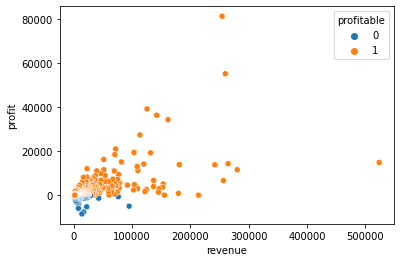

In [14]:
sns.scatterplot(x=df['revenue'],y=df['profit'],hue=df['profitable'],data=df,sizes=(10,500))

<div style="direction:rtl">היינו מצפות לראות שככל שהההכנסות יגדלו כך הרווחים יגדלו באופן ישיר. <br>
אנו רואות שאין קשר לינארי ברור במסקנה זו, בנוסף ניתן לראות שככל שההכנסות יהיו יותר נמוכות - כך הסיכוי שהחברה תהיה רווחית קטן יותר <br>
<br>
<br>
</div>

<div style="direction:rtl">כעת נבחן את הקשר  בין "revenue" ל"num. of employees". <br>
נבחן האם ההכנסות גדלות ככל שמספר העובדים גדל<br>

</div>

<AxesSubplot:xlabel='num. of employees', ylabel='revenue'>

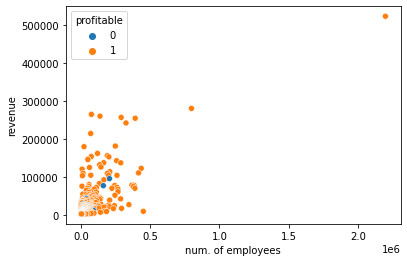

In [15]:
sns.scatterplot(x=df['num. of employees'],y=df['revenue'],hue=df['profitable'],data=df,sizes=(10,500))

### <div style="direction:rtl">:מסקנה(2) <br>
.ניתן לראות כי אין קשר לינארי ברור בין מספר העובדים לבין הכנסות החברה<br>
.בנוסף, בניגוד לפלוט הקודם, הדבר איננו מעיד בהכרח על רווחיות החברה משום שהפיזור גבוה<br>

</div>

# Ranking stability

<div style="direction:rtl"> נבחן את יציבות הדירוג. <br>
.נבחן אם הדירוג הינו חדשני, כלומר, חברות אשר נכנסות לדירוג שומרות על מיקומן באופן יחסי או שמא דירוג זה הינו דירוג דינמי<br>
.דבר זה מסמל את תנודתיות החברות המופיעות בו ועד כמה הן יציבות מבחינת ההכנסות שלהן באופן יחסי לשוק כולו<br>
<br>
<br>
</div>


<div style="direction:rtl">ניקוי הדאטה: <br>
העמודה של "prev_rank" הייתה בעייתית ולכן שיננו את הסוג שלה.<br>
בנוסף,ניקינו את החברות שלא הופיעו בדירוג בשנה הקודמת(2020).<br>
כעת ניתן לראות ש-477 החברות שהיו בדירוג בשנת 2020, נמצאות בדירוג גם בשנת 2021<br>
</div> 

In [16]:
check = df[df['prev_rank']!=' ']
check['prev_rank'] = check['prev_rank'].astype(float)
check.company.size

477

<div style="direction:rtl"> יצרנו שתי עמודות חדשות שבהן חילקנו את הדאטה לקבוצות לפי "rank" ולפי "prev_rank". <br>
.בחרנו לעשות זאת משום שאנו רוצות להשוות בין קבוצות הדירוג הקודם והנוכחי ולהתייחס לקבוצות דירוג מתוך הנחה שהקבוצות יותר יציבות<br>

</div>

In [17]:
check['DecileRank']= pd.qcut(check['rank'], 
                           q = 50, labels = False)

check['DecileRank2']= pd.qcut(check['prev_rank'], 
                           q = 50, labels = False)

<div style="direction:rtl"> יצרנו עמודה חדשה של האחוזונים ובה יצרנו תנאי שעובר על כל שורה בדאטה הרצויה. <br>
בנוסף, יצרנו פלוט שבוחן את אחוז החברות ששמרו על הדירוג שלהן.<br>

</div>

NO     0.698113
YES    0.301887
Name: Same_Decile, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


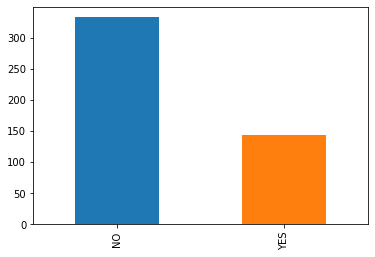

In [18]:
check['Same_Decile'] = np.where((check['DecileRank2']==check['DecileRank']), 'YES','NO')

print(check['Same_Decile'].value_counts()/477)
print(check['Same_Decile'].value_counts().plot(kind='bar',color=['C0','C1']))


<div style="direction:rtl"> ניתן לראות ש-70% מהחברות לא שמרו בדיוק על קבוצת הדירוג שלהן כפי שאנו חילקנו.לעומת זאת, 30% מהחברות כן שמרו על קבוצת הדירוג שלהן. <br>
משום שאנו קבענו את הדירוג,בחרנו להרחיב מעט את האפשרויות וכעת נבחן את סביבת קבוצת הדירוג בסטייה של 1 לשני הצדדים. <br>

</div>

YES    0.633124
NO     0.366876
Name: Same_Decile1, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


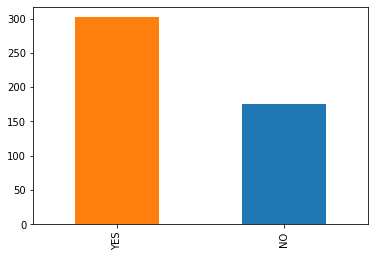

In [19]:
check['Same_Decile1'] = np.where( ((check['DecileRank2']!=check['DecileRank'])&
                                  (check['DecileRank2']!=check['DecileRank']+1)&
                                   (check['DecileRank2']!=check['DecileRank']-1)),'NO','YES' )

print(check['Same_Decile1'].value_counts()/477)
print(check['Same_Decile1'].value_counts().plot(kind='bar',color=['C1','C0']))

#### <div style="direction:rtl">: מסקנה(3) <br>
.אחוז החברות שנשארו בסביבת קבוצת הדירוג – 63.31%, עלייה משמעותית<br>
.כלומר, ניתן להבחין שכאשר מדברים על סביבת קבוצת הדירוג רוב החברות נשארות בקבוצת הדירוג שלהן<br>
.מכאן ניתן להסיק כי הדירוג של מגזין פורצ'ן הינו דירוג יציב והחברות שומרות באופן יחסי על המדרג שלהן<br>
</div>

# Sector Analysis

<div style="direction:rtl">סקטור – דירוג הסקטור כתלות בתדירות ההופעה: <br>
בחלק זה נבחן את הסקטורים השונים המופיעים במדד<br>
האם נציגות גדולה יותר של סקטור מסוים בדירוג הינה סימן לכך שאלה הסקטורים הרווחים ביותר והגדולים ביותר.<br>
</div>

Financials                       162
Energy                           109
Technology                       109
Retailing                         75
Health Care                       71
Business Services                 52
Industrials                       50
Materials                         46
Transportation                    38
Food, Beverages & Tobacco         37
Wholesalers                       35
Engineering & Construction        30
Hotels, Restaurants & Leisure     27
Chemicals                         27
Household Products                26
Media                             25
Motor Vehicles & Parts            22
Aerospace & Defense               22
Apparel                           16
Telecommunications                11
Food & Drug Stores                10
Name: sector, dtype: int64


<AxesSubplot:xlabel='sector'>

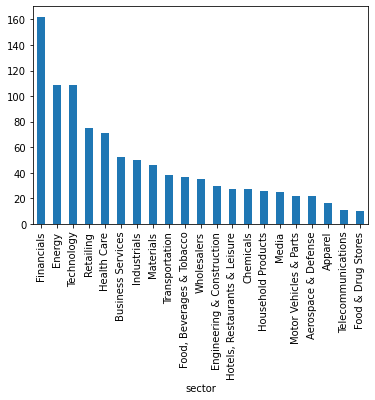

In [20]:
print(df.sector.value_counts())
df.groupby('sector')['sector'].count().sort_values(ascending=False).plot.bar()


<div style="direction:rtl"> ניתן להבחין כי שלושת הסקטורים שתדירותם הינה הרבה ביותר בדירוג הינם הסקטורים הפיננסים, האנרגיה והטכנולוגיה. <br>
נרצה להבין אם סדר זה של הסקטורים נכון גם במדדים אחרים.<br>
<br>
<br>
<br>

</div>

<div style="direction:rtl">נבחן את הסקטור לפי ממוצע ההכנסות. <br>
<br>

</div>


<AxesSubplot:xlabel='sector'>

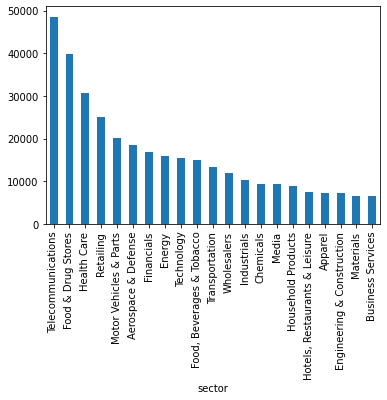

In [21]:
df.groupby(['sector'])['revenue'].mean().sort_values(ascending=False).plot(kind='bar')
# df.groupby(['sector'])['revenue'].mean().sort_values(ascending=False).plot(kind='pie')

<div style="direction:rtl"> ניתן לראות שהחברות הכי רווחיות הן כלל לא החברות שהכי נפוצות. <br>
כלומר, אין קשר בין כמות החברות שנמצאות במדד לבין ממוצע ההכנסות של כל סקטור <br>
<br>
<br>
<br>
</div>

<div style="direction:rtl">נבחן את הסקטור לפי ממוצע הרווחיות. <br>
<br>

</div>

<AxesSubplot:xlabel='sector'>

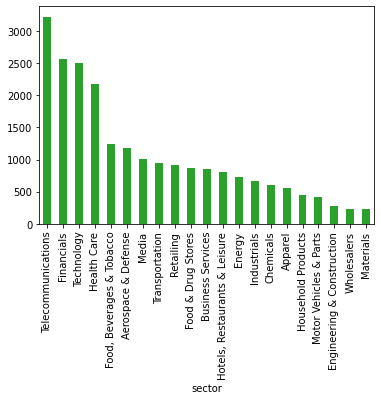

In [22]:
df.groupby(['sector'])['profit'].mean().sort_values(ascending=False).plot.bar(color='C2')

<div style="direction:rtl">ניתן לראות שפיננסים וטכנולוגיה נמצאות יחסית במקום הכי רווחי. <br>
כלומר, ניתן לראות שיש קשר ברווחיות.<br>
<br>
<br>
<br>
</div>

<div style="direction:rtl">נבחן את הסקטור לפי ממוצע עובדים. <br>
<br>

</div>

<AxesSubplot:xlabel='sector'>

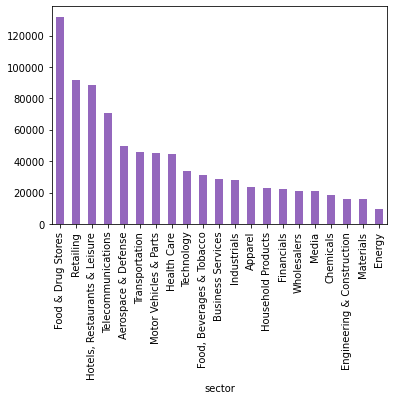

In [23]:
df.groupby(['sector'])['num. of employees'].mean().sort_values(ascending=False).plot.bar(color='C4')
# df.groupby(['sector'])['num. of employees'].mean().sort_values(ascending=False).plot(kind='pie')

#### <div style="direction:rtl"> :מסקנה(4) <br>
.אנו רואות שאין קשר בין ייצוג הסקטור בטבלת הנתונים לבין גודל החברה וההכנסות שלה,אולם כן יש קשר בין ייצוג הסקטורים והנתונים לבין ממוצע הרווחיות של אותה חברה <br>
<br>
<br>
<br>
<br>
<br>
<br>
</div>